# Jupyter Notebook: Guía para Diseño de Modelos en Deep Learning con TensorFlow/Keras

## 🔁 1. Importar librerías básicas
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt


## 📘 2. Conceptos clave: Epochs y Batch Size

### ¿Qué es una época (epoch)?
- Una **época** es una pasada completa por todo el dataset de entrenamiento.
- Si tienes 1000 muestras y `batch_size=100`, entonces cada época tiene 10 actualizaciones de pesos.

### ¿Qué es el batch size?
- Es el número de muestras procesadas antes de actualizar los pesos del modelo.
- Tamaños pequeños pueden generalizar mejor pero son más lentos.
- Tamaños grandes son más rápidos pero pueden sobreajustar.

**Regla práctica:**
- Usa `batch_size=32` o `64` como punto de partida.
- Observa el rendimiento con validación para decidir.


## 🧠 3. Funciones de activación

| Activación | Uso principal                         |
|------------|----------------------------------------|
| `ReLU`     | Capas ocultas (default recomendado)   |
| `Sigmoid`  | Salida binaria (0–1)                  |
| `Softmax`  | Salida multiclase (probabilidades)    |
| `tanh`     | Alternativa a ReLU, salida entre -1 y 1 |
| `Linear`   | Regresión (sin activación)            |


## 🏗️ 4. Capas y arquitectura del modelo

### Capas comunes:
- `Conv2D`: para entrada de imágenes.
- `MaxPooling2D`: para reducir dimensionalidad.
- `Flatten`: convierte tensor 3D a vector.
- `Dense`: capa totalmente conectada.
- `Dropout`: para prevenir overfitting.

### Cómo manejar capas:
- Entrada → debe coincidir con la forma de tus datos.
- Salida → depende del tipo de problema:
  - Binario → 1 neurona + `sigmoid`
  - Multiclase → n neuronas + `softmax`
  - Regresión → 1 neurona + `linear`


## 🧪 5. Clasificación binaria: ejemplo

model_bin = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_bin.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_bin.summary()


## 🎯 6. Clasificación multiclase: ejemplo

model_multi = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_multi.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_multi.summary()


## 📈 7. Regresión: ejemplo

model_reg = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(1)  # sin activación: salida continua
])

model_reg.compile(optimizer='adam',
                  loss='mean_squared_error')

model_reg.summary()


## 🧩 8. Validación y EarlyStopping

### Validación
- Puedes pasar datos de validación con `validation_data=(X_val, y_val)` al entrenar.

```python
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val))
```

### EarlyStopping
- Detiene el entrenamiento si la validación deja de mejorar.

```python
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])
```


## ✅ 9. Buenas prácticas

- **Normaliza** los datos (0–1 o media 0, varianza 1).
- Usa `Dropout` para evitar overfitting.
- Usa `EarlyStopping` con `validation_data` si el dataset es grande.
- Prueba arquitecturas más profundas **gradualmente**.
- Visualiza las métricas de validación.


## 📊 10. Visualizar métricas de entrenamiento

def plot_training(history):
    plt.plot(history.history['accuracy'], label='Train acc')
    plt.plot(history.history.get('val_accuracy', []), label='Val acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title("Training history")
    plt.show()

# Uso:
# history = model.fit(...)
# plot_training(history)


## 🧠 11. Resumen rápido

| Tarea         | Salida             | Activación | Pérdida                          |
|---------------|--------------------|------------|----------------------------------|
| Binaria       | 1 neurona          | sigmoid    | binary_crossentropy              |
| Multiclase    | n clases (softmax) | softmax    | sparse_categorical_crossentropy  |
| Regresión     | 1 neurona          | linear     | mean_squared_error               |

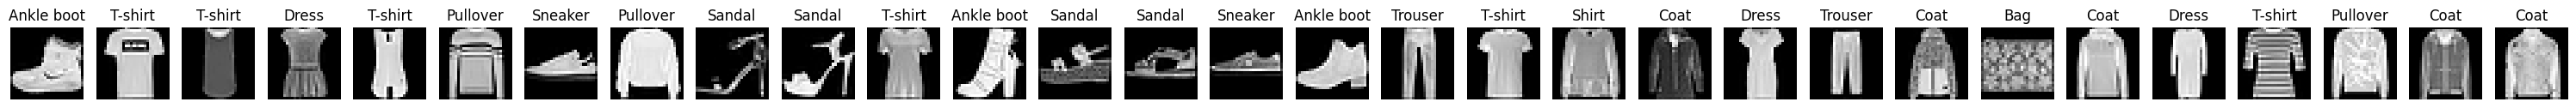

In [18]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalizar a valores entre 0 y 1 y añadir canal
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0
X_train = np.expand_dims(X_train, axis=-1)  # (batch, 28, 28, 1)
X_test = np.expand_dims(X_test, axis=-1)

# Mostrar 10 imágenes de ejemplo
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(30, 2))
for i in range(30):
    plt.subplot(1, 30, i+1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 clases
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7471 - loss: 0.7315 - val_accuracy: 0.8638 - val_loss: 0.3861
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8700 - loss: 0.3592 - val_accuracy: 0.8787 - val_loss: 0.3379
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8887 - loss: 0.3023 - val_accuracy: 0.8888 - val_loss: 0.3040
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9014 - loss: 0.2676 - val_accuracy: 0.8938 - val_loss: 0.2900
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9125 - loss: 0.2393 - val_accuracy: 0.9024 - val_loss: 0.2773
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9176 - loss: 0.2256 - val_accuracy: 0.9033 - val_loss: 0.2729
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9243 - loss: 0.2056 - val_accuracy: 0.9077 - val_loss: 0.2683
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9307 - loss: 0.1877 - va

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en test: {test_acc:.2%}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8939 - loss: 0.3177
Precisión en test: 89.40%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


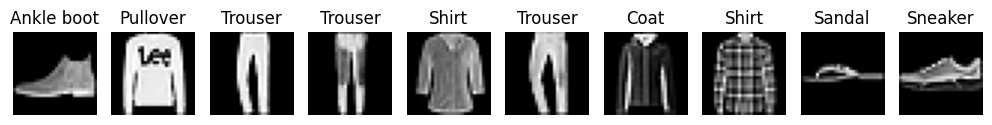

In [22]:
preds = model.predict(X_test[:10])
pred_classes = np.argmax(preds, axis=1)

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title(class_names[pred_classes[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()